<a href="https://colab.research.google.com/github/lucia1970-student/GA-PyTorch/blob/main/SNN_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet

/content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet


In [3]:
#Autism prognosis using voice biomarkers.

#Dataset from study below.  Available on request.
# https://www.nature.com/articles/s41398-023-02554-8#Fig2

#I am proposing ALL characteristics of voice biomarkers (19) and 2 target
#classes (CTRL (no TD) and ASD) in order to classify data.
#The purpose of this iteration is to validate the study results.
#The validation steps are detailed below:

#1. Selecting ALL characteristicss and 2 classes ('ASD' and 'TD') as per study's
#identified characteristics and classes.  The 19 characteristics have been ranked
# with Recursive Feature Elimination (RFE).  No characteristics were eliminated at
# this stage.

#2. Applied feature rankings and applied  dimension reduction with RFE and PCA.
# PCA components = 4 @ 99% coverage.  84 rows out 108, no rows were eliminated.

#3. Split dataset into train/test (70%/30%) and apply a Simple Neural Network
#with ROC scoring including optimal threshold.

#4 Plot the ROC_AUC curve with optimal threshold.

#5.Plot confusion matrix displaying

import numpy as np

#Load data.
import pandas as pd
df=pd.read_csv("voice_data.csv")
data=df.copy()
display.max_columns = None
display.nax_rows = None
display(data)
display(data.columns)

a = np.count_nonzero(data.Group == 'TD')
b = td_count = np.count_nonzero(data.Group == 'IC')
c = td_count = np.count_nonzero(data.Group == 'SLI')
d = np.count_nonzero(data.Group == 'ASD')
z = a + b + c
print('CTRL count without TD (24): ', z)
print('ASD count: ', d)
display(data.value_counts())


,Group,avg_f0,avg_F1,avg_F2,avg_F3,avg_F4,mean_hnr,jitter,shimmer,dispersion_formantique,avg_f0_k,mean_hnr_k,jitter_k,shimmer_k,dispersion_formantique_k,avg_f0_s,mean_hnr_s,jitter_s,shimmer_s,dispersion_formantique_s
0,ASD,304.75,778.00,2245.60,3571.05,5081.95,10.75,1.958567,1.377360,1434.650000,4.120596,6.512729,4.430703,2.066858,5.193159,1.026296,1.519206,1.205160,-0.259522,0.069057
1,ASD,294.45,662.70,1939.90,3251.25,4775.30,12.25,1.663247,1.389308,1370.866667,2.278845,3.440682,3.091686,3.108758,2.927942,0.133170,0.667077,0.560049,-0.244830,-0.390032
2,ASD,255.85,884.55,2183.50,3513.75,5111.40,12.90,1.422039,1.185426,1408.950000,1.737850,5.391922,2.999970,3.019235,2.481138,0.169958,1.548892,0.722608,-0.348192,0.175821
3,ASD,292.75,652.05,2022.60,3177.75,4634.10,8.65,1.729150,1.645441,1327.350000,8.688811,2.620909,2.320086,2.652073,2.249446,-2.098723,-0.134290,0.045519,0.452664,0.225971
4,ASD,305.75,739.75,2294.25,3706.60,4807.55,8.30,2.033454,1.544171,1355.933333,3.761873,3.485672,3.841500,7.036189,3.318189,0.993320,0.670789,1.151768,-1.606129,-0.338201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,TD,255.05,858.95,2223.80,3384.55,4787.25,9.75,1.111741,1.302515,1309.433333,5.190369,3.365465,1.875519,3.242620,1.881098,1.338850,0.806779,0.273689,-0.246472,0.152368
104,TD,265.00,1022.95,2350.50,3596.25,4973.85,9.80,2.340409,1.299065,1316.966667,3.619754,6.548035,8.302562,2.789693,4.012588,1.028263,1.752227,2.363517,0.612808,0.451664
105,TD,266.45,762.45,2278.70,3557.60,4742.95,10.95,1.489093,1.517415,1326.833333,2.151113,2.531716,3.208905,2.385634,3.771958,0.114164,0.130736,0.951328,-0.507807,1.004282
106,TD,274.95,873.00,2299.70,3672.65,4917.65,9.35,1.391963,1.264749,1348.216667,3.473041,2.755562,2.825725,2.361107,2.442094,-0.777756,0.412494,0.655506,0.554750,-0.074498


Index(['Group', 'avg_f0', 'avg_F1', 'avg_F2', 'avg_F3', 'avg_F4', 'mean_hnr',
       'jitter', 'shimmer', 'dispersion_formantique', 'avg_f0_k', 'mean_hnr_k',
       'jitter_k', 'shimmer_k', 'dispersion_formantique_k', 'avg_f0_s',
       'mean_hnr_s', 'jitter_s', 'shimmer_s', 'dispersion_formantique_s'],
      dtype='object')

CTRL count without TD (24):  70
ASD count:  38


Group  avg_f0  avg_F1   avg_F2   avg_F3   avg_F4   mean_hnr  jitter    shimmer   dispersion_formantique  avg_f0_k  mean_hnr_k  jitter_k  shimmer_k  dispersion_formantique_k  avg_f0_s  mean_hnr_s  jitter_s   shimmer_s  dispersion_formantique_s
ASD    135.35  988.15   2393.45  3640.05  4875.60  4.90      1.490435  1.602262  1295.816667             7.724096  3.591570    5.565571  7.160721   1.632535                  2.314049   0.899021    1.875244   2.080483   0.021249                   1
SLI    267.15  950.75   2354.50  3420.55  4681.85  9.80      1.222840  1.100797  1243.700000             3.163465  2.026336    2.003743  2.851964   2.089819                  0.824082   0.472550    0.358002   0.339679  -0.061841                   1
       300.80  769.60   2079.05  3331.15  4790.55  14.15     0.790875  1.102135  1340.316667             3.220332  2.145983    2.468427  2.772546   3.880961                  1.094163   0.190177    0.845510   0.510875   0.261225                   1
       300.30  1001.35  2518.35  3970.90  5302.25  13.30     1.498298  1.501590  1433.633333             3.677679  2.536378    4.656360  5.951269   3.461849                  0.711598   0.362425    1.380237   0.763329   0.567253                   1
       291.35  1029.95  2440.60  3591.35  4955.00  10.15     1.155211  1.010466  1308.350000             6.415412  6.520670    2.538592  2.137952   2.184312                  1.744851   1.761442    0.915314   0.059145   0.006798                   1
                                                                                                                                                                                                                                                     ..
ASD    335.30  668.75   2005.45  3214.50  4607.80  9.60      1.705673  1.562046  1313.016667             3.668807  3.216171    2.332092  3.348500   2.970892                  0.467641   0.735932    0.271600  -0.835370  -0.251010                   1
       334.10  684.90   2094.30  3579.70  4856.10  11.30     2.190127  1.458687  1390.400000             3.270168  2.770940    2.156335  2.384491   3.616185                  0.073779   0.540132   -0.271603  -0.347822   0.721927                   1
       331.95  779.30   2271.30  3687.00  4806.70  9.30      1.989887  1.514565  1342.466667             3.788538  2.111079    3.193975  3.715863   2.814807                  0.336245  -0.508081    0.757273   1.094934   0.379331                   1
       325.80  773.75   2243.80  3530.95  4862.85  8.50      2.070477  1.697217  1363.033333             8.262409  2.766723    2.527389  2.369298   2.733893                  2.055750  -0.081247    0.729531  -0.299465   0.665008                   1
TD     319.55  1073.60  2495.70  3786.50  4988.30  7.70      1.153545  1.174254  1304.900000             2.853541  2.986775    4.395455  2.258666   2.654484                  0.807288  -0.228113    1.250874   0.182217   0.282963                   1
Name: count, Length: 108, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()

# Create a copy of the DataFrame before filtering and modifying it
df_filtered = df[df['Group'] != 'TD'].copy()

# Apply filtered DataFrame
df_filtered['Group_Encoded'] = le.fit_transform(df_filtered['Group'])

y = df_filtered['Group_Encoded'].values
df_filtered.drop('Group_Encoded', axis=1, inplace=True)
X = df_filtered.iloc[:, 1:]

display(X)

,avg_f0,avg_F1,avg_F2,avg_F3,avg_F4,mean_hnr,jitter,shimmer,dispersion_formantique,avg_f0_k,mean_hnr_k,jitter_k,shimmer_k,dispersion_formantique_k,avg_f0_s,mean_hnr_s,jitter_s,shimmer_s,dispersion_formantique_s
0,304.75,778.00,2245.60,3571.05,5081.95,10.75,1.958567,1.377360,1434.650000,4.120596,6.512729,4.430703,2.066858,5.193159,1.026296,1.519206,1.205160,-0.259522,0.069057
1,294.45,662.70,1939.90,3251.25,4775.30,12.25,1.663247,1.389308,1370.866667,2.278845,3.440682,3.091686,3.108758,2.927942,0.133170,0.667077,0.560049,-0.244830,-0.390032
2,255.85,884.55,2183.50,3513.75,5111.40,12.90,1.422039,1.185426,1408.950000,1.737850,5.391922,2.999970,3.019235,2.481138,0.169958,1.548892,0.722608,-0.348192,0.175821
3,292.75,652.05,2022.60,3177.75,4634.10,8.65,1.729150,1.645441,1327.350000,8.688811,2.620909,2.320086,2.652073,2.249446,-2.098723,-0.134290,0.045519,0.452664,0.225971
4,305.75,739.75,2294.25,3706.60,4807.55,8.30,2.033454,1.544171,1355.933333,3.761873,3.485672,3.841500,7.036189,3.318189,0.993320,0.670789,1.151768,-1.606129,-0.338201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,272.40,1048.20,2396.10,3607.90,4777.30,8.65,1.148303,1.353881,1243.033333,2.016973,2.138940,2.361210,3.209799,2.195920,-0.675089,-0.074399,0.689445,-0.774658,-0.183286
80,301.10,782.05,2184.90,3415.10,4666.85,11.00,1.254625,0.952392,1294.933333,11.621063,2.995300,2.293056,2.490964,2.263339,-2.734114,-0.011581,0.444379,0.013398,-0.097667
81,286.40,771.40,2272.80,3570.15,5088.50,10.35,1.583144,1.138822,1439.033333,1.879826,4.383631,8.614788,2.707580,1.990779,-0.242029,1.170294,2.336884,0.309732,0.185251
82,261.35,682.65,2352.25,3547.65,5095.75,12.10,1.463657,1.052067,1471.033333,2.322844,1.838558,2.875774,1.973561,2.330892,0.462941,0.378098,0.655235,0.279183,-0.266588


First 4 best features:  ['avg_F1' 'jitter' 'shimmer' 'jitter_s']


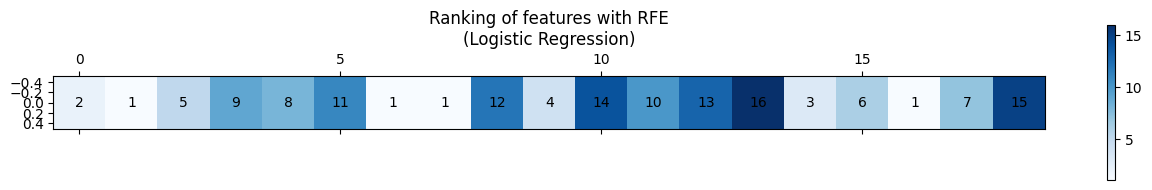


y:  84

X:  84


In [5]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("rfe", RFE(estimator=LogisticRegression(), n_features_to_select=4, step=1)),
    ]
)

pipe.fit(X, y)

print("First 4 best features: ", pipe.get_feature_names_out())

ranking = pipe.named_steps["rfe"].ranking_
ranking = ranking.reshape(1, -1)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)

# Add annotations for pixel numbers
for i in range(ranking.shape[0]):
    for j in range(ranking.shape[1]):
        plt.text(j, i, str(ranking[i, j]), ha="center", va="center", color="black")

plt.colorbar()
plt.title("Ranking of features with RFE\n(Logistic Regression)")
plt.show()

print('\ny: ' , len(y))
print('\nX: ', len(X))

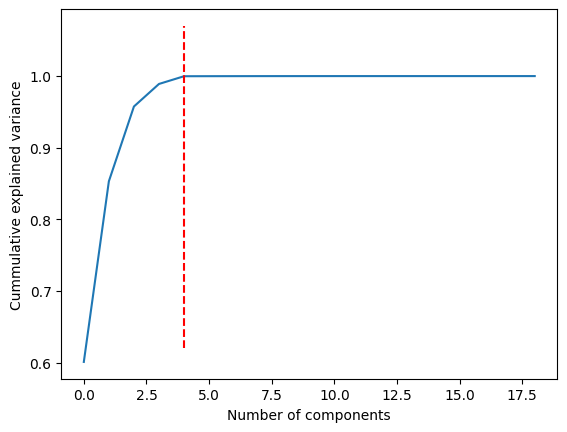

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
my = np.array(np.arange(0.62, 1.1, 0.15))
mx = np.array([4]*(len(my)))
plt.plot(mx,my,c='red', linestyle='--')
plt.ylabel('Cummulative explained variance')
plt.show()


In [7]:
import numpy as np
from sklearn.decomposition import PCA

pca.n_components = 4
X = pca.fit_transform(X)
print("Explained Variance Ratio: ", sum(pca.explained_variance_ratio_))
display(len(X))

Explained Variance Ratio:  0.9890077247677216


84

Epoch [5/30], Loss: 0.6869
Epoch [10/30], Loss: 0.6714
Epoch [15/30], Loss: 0.6564
Epoch [20/30], Loss: 0.6416
Epoch [25/30], Loss: 0.6271
Epoch [30/30], Loss: 0.6126
Optimal Threshold (Youden's J-Index): 0.4541

Threshold: 0.45
TP: 8, FP: 1, FN: 4, TN: 13


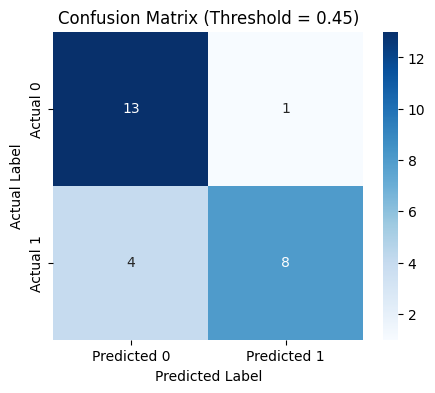

<function matplotlib.pyplot.show(close=None, block=None)>

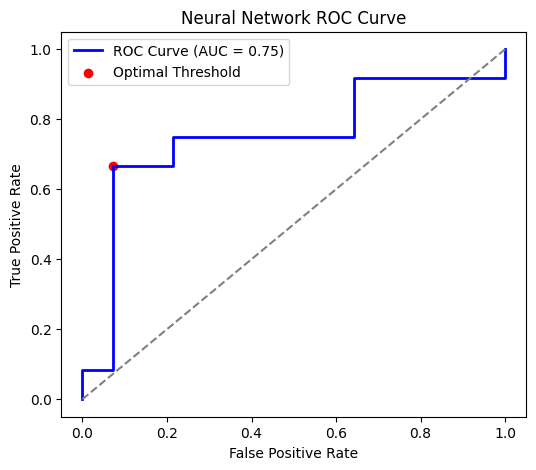

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your original DataFrame
# Filter data to include only 'ASD' and 'CTRL' groups (where CTRL is the combination of 'IC' and 'SLI')
df_filtered = df[(df['Group'] == 'ASD') | (df['Group'] == 'IC') | (df['Group'] == 'SLI')].copy()

# Create a new target variable 'y' with binary labels:
# 0 for 'CTRL' (combined 'IC' and 'SLI') and 1 for 'ASD'
df_filtered['Group_Encoded'] = np.where(df_filtered['Group'] == 'ASD', 1, 0)  # 1 for ASD, 0 for CTRL

y = df_filtered['Group_Encoded'].values
X = df_filtered.iloc[:, 1:].values  # Features

# Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Shape (batch, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# ---- Define Neural Network ---- #
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x)  # Probability output

# Initialize Model
model = SimpleNN(input_size=X_train.shape[1])  # Use the correct input size based on the X data
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ---- Train the Model ---- #
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# ---- Evaluate & Compute Metrics ---- #
model.eval()
with torch.no_grad():
    y_scores = model(X_test_tensor).numpy().flatten()  # Predicted probabilities
    y_true = y_test_tensor.numpy().flatten()

# ---- Compute ROC & Find Optimal Threshold ---- #
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Find Best Threshold using Youden’s J-Index (maximizing (TPR - FPR))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold (Youden's J-Index): {optimal_threshold:.4f}")

# ---- Compare Confusion Matrices for Different Thresholds ---- #
thresholds_to_test = [optimal_threshold]  # Test different thresholds

for threshold in thresholds_to_test:
    y_preds = (y_scores >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_preds).ravel()

    print(f"\nThreshold: {threshold:.2f}")
    print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")

    plt.figure(figsize=(5,4))
    sns.heatmap([[tn, fp], [fn, tp]], annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix (Threshold = {threshold:.2f})")
    plt.show()

# ---- Plot ROC Curve ---- #
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label="Optimal Threshold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Neural Network ROC Curve")
plt.legend()
plt.show